# SVM on free vs cued recall segments

The VeriMind statements are encoded as either Free or Cued Recall:
- 1 denotes free recall 
- 2 denotes cued recall
- 3 denotes recalls from the question “do you have something to add”.

We will apply our SVM pipeline first to Cued Recall statements (encoding 2). 

Then we will apply the SVM pipeline to Free Recall statements, where we regard encoding 1 and 3 both as free recall. 

Lastly we try running encoding 1 separately, and encoding 2 and 3 together. 

For every segmentation the pipeline is run with an exhaustive grid search that optimizes the hyperparameters for AUC and F1-macro score respectively. 

The results show that we obtain the best results (AUC=0.71, F1-macro=0.58), when running the svm pipeline on encoding 1 and 3. Same AUC score is achieved on encoding 1 alone but lower F1-macro=0.56


In [1]:
import os
import sys
import json

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from src.utils import within_subject_functional_normalization

In [3]:
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.config import AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES
from src.plots.misc import plot_hist
from src.svm.pipeline import svm_pipeline

In [5]:
df = pd.read_csv("../data/master_functionals_new_features.csv")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,1.78,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,1.58,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,7.48,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.09,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,1.29,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,2.67,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,1.00,0.166667,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.85800,...,1,100.0,1.0,1,1.92,0.174545,0.0,0.0,0.0,0.0
3335,3335,0,33.463300,0.230548,24.733616,36.905180,38.047897,13.314281,255.713210,0.00000,...,1,100.0,1.0,1,0.00,0.000000,0.0,0.0,0.0,0.0


In [6]:
df["free_cued_recall"].value_counts()

free_cued_recall
2    2760
1     555
3      22
Name: count, dtype: int64

## Cued Recall

Encoding 2.

In [7]:
df_fr = df[df['free_cued_recall'] == 2]
df_fr

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,3.35,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,2.46,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,8.16,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.92,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,3.15,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,27.852308,0.230130,19.607422,31.506860,34.374207,14.766785,68.922646,0.00000,...,1,100.0,1.0,2,1.36,0.160000,0.0,0.0,0.0,0.0
3331,3331,0,27.687168,0.203770,20.195457,31.439848,32.236520,12.041061,205.113660,173.75590,...,0,100.0,1.0,2,2.26,0.197500,0.0,0.0,0.0,0.0
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,8.35,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,2.17,0.166667,0.0,0.0,0.0,0.0


In [8]:
participant_ids = df_fr["participant"].values

df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_fr

/tmp/ipykernel_18021/3488234880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.247128,0.243029,0.921134,0.437355,0.230216,-0.885828,0.070261,0.297254,...,0,20.0,1.0,2,0.131954,-0.003536,0.331042,0.875762,-0.475010,-0.427179
1,1,0,-0.749761,0.877474,-2.046840,-0.406191,0.026621,2.499573,-0.826910,-0.650424,...,1,80.0,1.0,2,-0.068528,0.011551,0.256046,1.037393,-0.542636,-0.411693
2,2,0,-0.638487,-0.349550,-0.118559,-0.822770,-0.789592,-0.713067,-0.025660,0.166837,...,1,60.0,1.0,2,4.443974,1.381418,5.641326,2.236068,-0.267261,0.000000
3,3,0,0.869613,-0.602675,1.053841,0.987032,0.467012,-0.829644,-0.287560,-0.378629,...,1,100.0,2.0,2,-0.596676,-0.653095,-0.687871,-0.524350,-0.353553,-0.282843
4,4,0,0.376321,-0.495052,0.631315,-0.118100,-0.203377,-0.727075,-0.972397,-0.572318,...,1,80.0,1.0,2,-0.274330,-0.358778,-0.091971,-0.665138,-0.532152,-0.456435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,-0.426296,0.663743,-0.868541,0.187972,0.124666,1.117658,-0.764227,-0.782672,...,1,100.0,1.0,2,-0.867020,-0.382743,-0.651631,-0.583460,-0.485071,-0.324443
3331,3331,0,-1.539264,1.351452,-2.201691,-0.036868,-0.475255,2.262863,0.058690,-0.120579,...,0,100.0,1.0,2,-0.157974,0.024723,-0.750479,-0.387241,-0.185695,-0.208514
3332,3332,0,-0.400184,1.311611,-1.038010,-0.400750,0.304980,1.579452,0.831461,0.869225,...,1,80.0,1.0,2,2.138665,0.171206,1.938794,1.053370,-0.529150,-0.446476
3333,3333,0,-0.183899,-0.212176,0.548571,0.198088,-0.506959,-0.892824,0.468644,0.221079,...,1,80.0,2.0,2,-0.052484,-0.178510,-0.687871,-0.524350,-0.353553,-0.282843


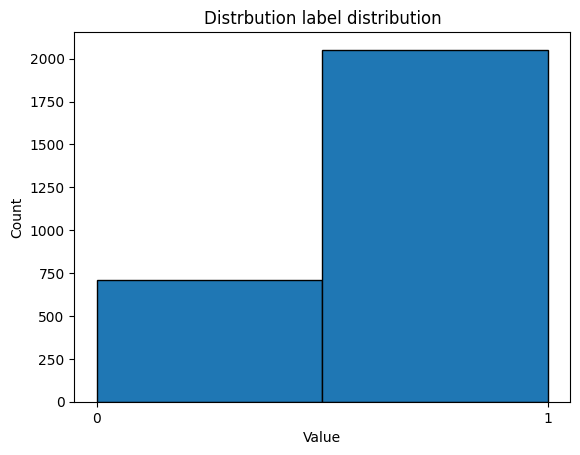

In [9]:
y = df_fr["accuracy"].values
x = df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.604981884057971
std (train): 0.012397844489834477
avg (validation): 0.5724637681159421
std (validation): 0.019172110949743425

printing roc_auc measures
avg (train): 0.6721130097632201
std (train): 0.005190793593029446
avg (validation): 0.6164679157359876
std (validation): 0.023114074272837314

printing f1_macro measures
avg (train): 0.5760508511352844
std (train): 0.008703527242160773
avg (validation): 0.5409679434682623
std (validation): 0.01829469991448834


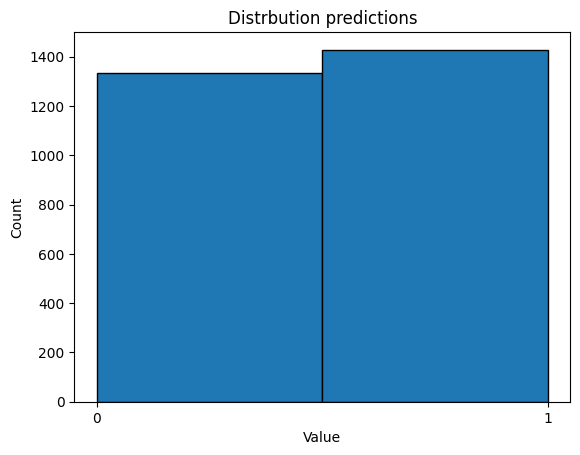

              precision    recall  f1-score   support

           0       0.32      0.61      0.42       708
           1       0.81      0.56      0.66      2052

    accuracy                           0.57      2760
   macro avg       0.56      0.58      0.54      2760
weighted avg       0.68      0.57      0.60      2760


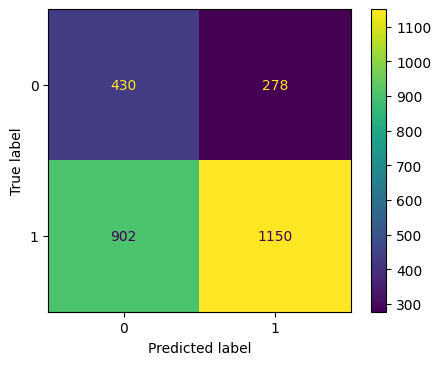

Cohen's Kappa score:  0.1301951131964207
params after probability set to True:
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


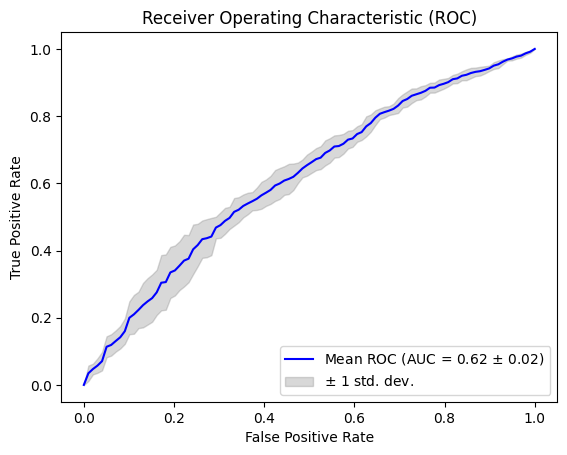

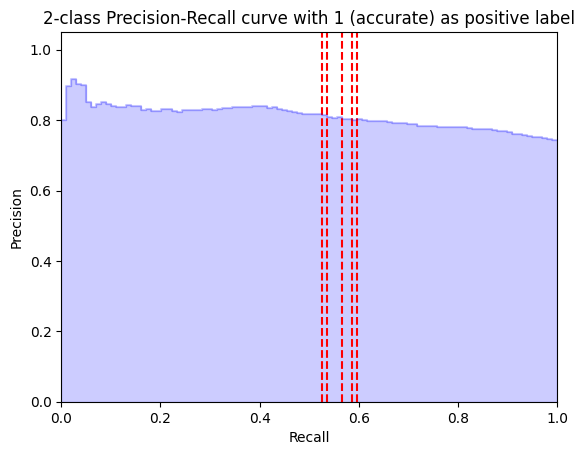

In [10]:
svm_pipeline(x, y, "roc_auc")

running param search
finished param search
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.6461050724637681
std (train): 0.010696846335677187
avg (validation): 0.6123188405797102
std (validation): 0.027617157971245636

printing roc_auc measures
avg (train): 0.6809814057229756
std (train): 0.00665480215931845
avg (validation): 0.6119187828763116
std (validation): 0.033428665782298944

printing f1_macro measures
avg (train): 0.601674639720953
std (train): 0.00745249908252542
avg (validation): 0.5624912926697363
std (validation): 0.02855739140593092


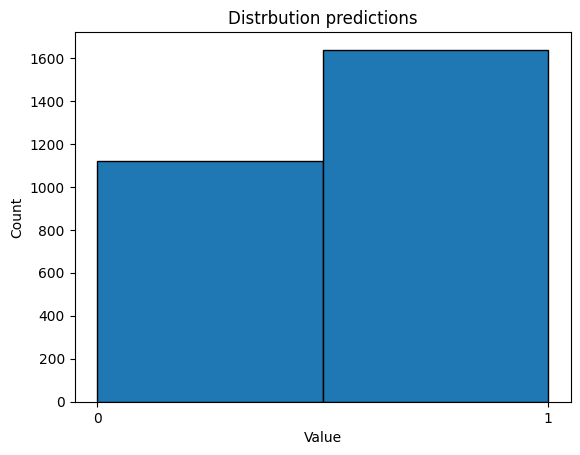

              precision    recall  f1-score   support

           0       0.34      0.54      0.42       708
           1       0.80      0.64      0.71      2052

    accuracy                           0.61      2760
   macro avg       0.57      0.59      0.56      2760
weighted avg       0.68      0.61      0.63      2760


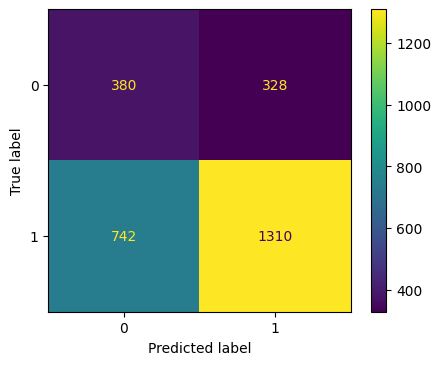

Cohen's Kappa score:  0.14697889803954195
params after probability set to True:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


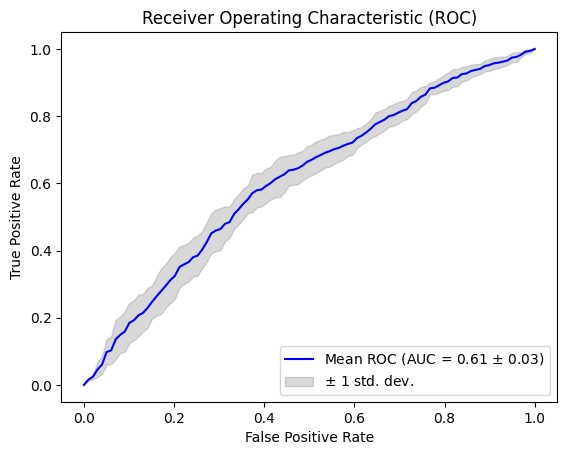

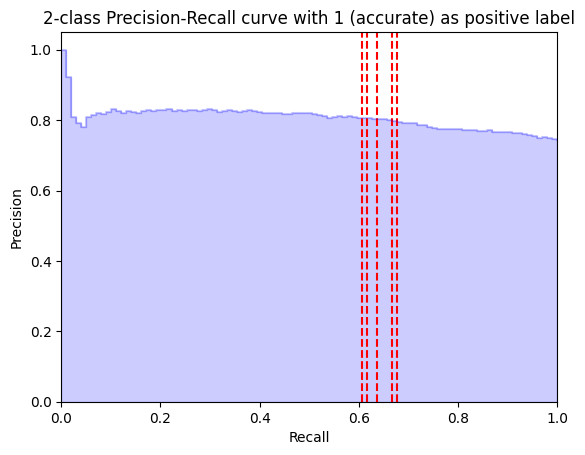

In [11]:
svm_pipeline(x, y, "f1_macro")

## Free Recall

Encoding 1 and 3 together.

In [11]:
df_cr = df[(df['free_cued_recall'] == 1) | (df['free_cued_recall'] == 3)]

In [12]:
df_cr

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,32.923183,0.033205,32.044086,32.676346,33.693400,1.649315,19.743969,11.842160,...,1,100.0,1.0,1,0.46,0.115000,0.0,0.0,0.0,0.0
16,16,0,20.974648,0.156597,18.389637,19.926580,24.381973,5.992336,92.538580,74.097580,...,1,100.0,1.0,1,2.88,0.261111,2.0,0.0,0.0,0.0
33,33,0,23.000427,0.173643,18.209530,23.437542,27.607498,9.397968,155.602460,164.689700,...,1,100.0,1.0,1,1.22,0.122000,0.0,0.0,0.0,0.0
39,39,0,37.571743,0.025486,36.763130,37.658370,38.466846,1.703716,32.898453,23.745441,...,1,NaN,NaN,1,0.32,0.040000,0.0,0.0,0.0,0.0
41,41,0,31.395313,0.185868,24.464250,33.889618,36.212710,11.748461,655.493400,1005.896300,...,1,100.0,1.0,3,0.34,0.090000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,22.760036,0.116876,21.855537,22.616938,23.708267,1.852730,53.822320,28.276720,...,1,NaN,NaN,1,1.57,0.256667,0.0,0.0,0.0,0.0
3313,3313,0,33.311300,0.038063,32.446200,32.790160,34.015087,1.568886,11.343438,5.040899,...,1,100.0,1.0,1,2.54,0.280000,1.0,0.0,0.0,0.0
3322,3322,0,22.198885,0.125262,20.153378,22.844580,24.517183,4.363806,135.166300,124.021720,...,1,NaN,NaN,1,0.96,0.074167,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.858000,...,1,100.0,1.0,1,2.61,0.174545,0.0,0.0,0.0,0.0


In [13]:
participant_ids = df_cr["participant"].values

df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_cr

/tmp/ipykernel_18021/4292453465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,0.222011,-1.476180,0.607229,0.109329,-0.503131,-1.010456,-0.762776,-0.695276,...,1,100.0,1.0,1,-1.087347,0.890485,0.000000,0.000000,0.000000,0.000000
16,16,0,0.162070,1.274653,-0.332071,-0.199883,1.156364,1.903513,0.609296,0.398419,...,1,100.0,1.0,1,2.788441,2.258260,2.940588,0.000000,0.000000,0.000000
33,33,0,-0.947464,1.462671,-2.659530,-0.347434,1.523171,3.145803,0.407245,0.343628,...,1,100.0,1.0,1,-0.377583,-0.466001,-0.816497,-0.267261,0.000000,0.000000
39,39,0,1.377801,-1.446850,0.875876,1.502217,2.141795,-0.699061,-1.076670,-0.661563,...,1,NaN,NaN,1,-0.639206,-0.838333,-0.485071,-0.277350,-0.277350,0.000000
41,41,0,0.715256,-0.029246,0.094138,0.810608,0.890529,0.426734,2.513541,2.951436,...,1,100.0,1.0,3,-1.375165,-0.830305,-0.324443,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,-1.288958,-0.441700,-0.703013,-1.065515,-1.527071,-1.550925,-0.690201,-0.751148,...,1,NaN,NaN,1,-0.292224,0.690013,-0.688247,-0.483368,-0.447214,-0.301511
3313,3313,0,1.254800,-1.838889,0.895292,0.419094,0.034952,-0.712159,-0.972932,-0.792081,...,1,100.0,1.0,1,-0.415168,-0.015188,-0.127000,-0.353553,-0.353553,-0.353553
3322,3322,0,0.236137,-0.885988,0.449331,0.553671,0.098263,-0.455456,1.104841,1.497956,...,1,NaN,NaN,1,0.257579,-0.944164,-0.353553,0.000000,0.000000,0.000000
3334,3334,0,-0.215821,-0.732918,0.547938,-0.492261,-0.640395,-0.829169,0.415597,1.358923,...,1,100.0,1.0,1,0.193762,-0.722601,-0.899229,-0.585206,-0.277350,0.000000


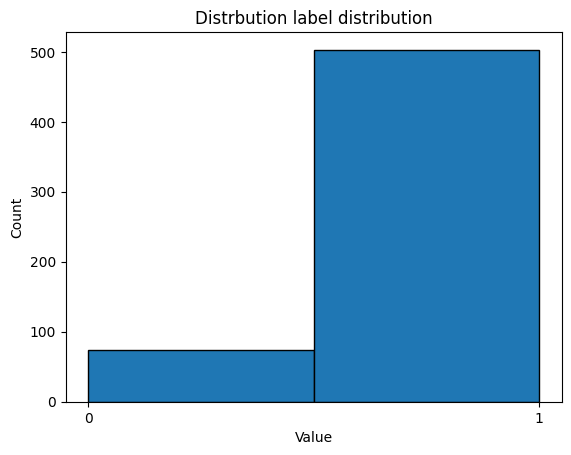

In [14]:
y = df_cr["accuracy"].values
x = df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.7409058042463682
std (train): 0.009117462321774121
avg (validation): 0.6983958020989506
std (validation): 0.0729462207286548

printing roc_auc measures
avg (train): 0.8313541871330565
std (train): 0.010678348990334758
avg (validation): 0.709601885902876
std (validation): 0.03453310653307836

printing f1_macro measures
avg (train): 0.6278695441768145
std (train): 0.007574381101370363
avg (validation): 0.580884898451679
std (validation): 0.06417629178371241


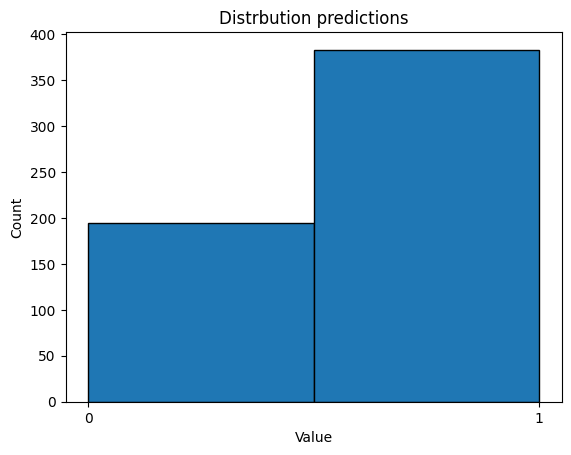

              precision    recall  f1-score   support

           0       0.24      0.64      0.35        74
           1       0.93      0.71      0.80       503

    accuracy                           0.70       577
   macro avg       0.59      0.67      0.58       577
weighted avg       0.84      0.70      0.75       577


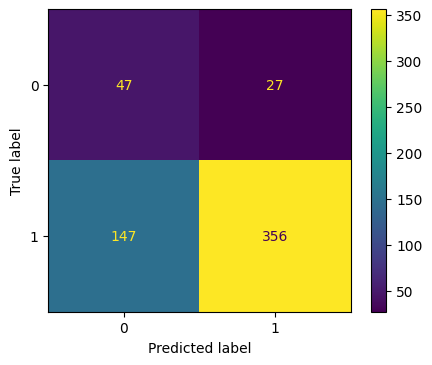

Cohen's Kappa score:  0.20270957085226
params after probability set to True:
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


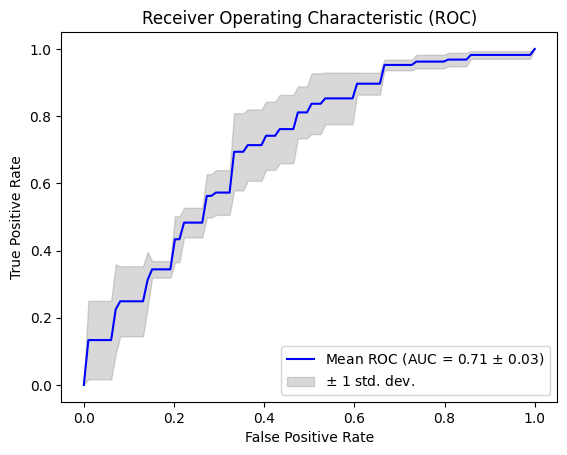

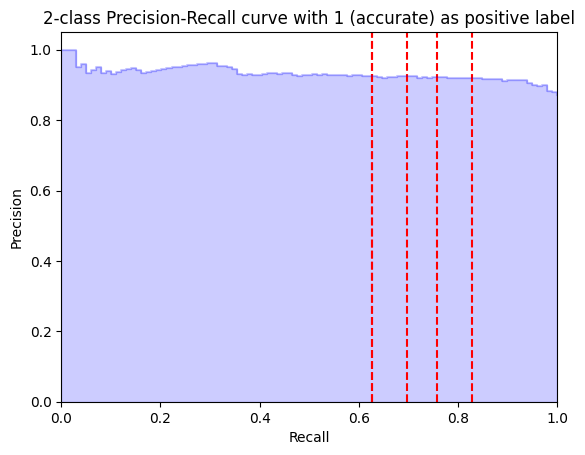

In [16]:
svm_pipeline(x, y, "roc_auc")

params after probability set to True:
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


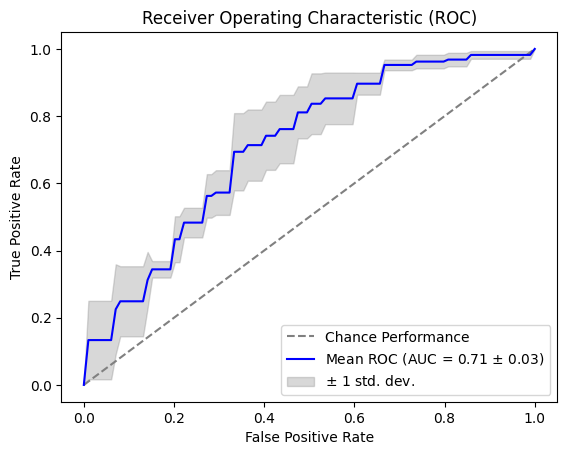

In [15]:
from src.visualization.prec_recall_curve import plot_auc_curve  # plot precision recall curve
svc = SVC(**{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}, probability=True)

print("params after probability set to True:")
print(svc.get_params())

plot_auc_curve(svc, x, y)

In [16]:
from sklearn.metrics import confusion_matrix
from src.learning.get_splits import get_splits

optimal_parameters = {'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

svc = SVC(**optimal_parameters)
# get the predictions using cross validation
splits = get_splits(x, y)
y_pred = cross_val_predict(svc, x, y, cv=splits, n_jobs=-1)

conf_mat = confusion_matrix(y, y_pred)

In [17]:
conf_mat

array([[ 47,  27],
       [147, 356]])

In [20]:
# Extract values from the confusion matrix
TN, FP, FN, TP = conf_mat.ravel()

# Calculate the False Alarm Rate (FAR)
FAR = FP / (TN + FP)

print("False Alarm Rate (FAR):", FAR)

# Calculate the True Positive Rate (TPR)
TPR = TP / (TP + FN)

print("True Positive Rate (TPR):", TPR)

False Alarm Rate (FAR): 0.36486486486486486
True Positive Rate (TPR): 0.7077534791252486


running param search
finished param search
{'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'poly'}

printing accuracy measures
avg (train): 1.0
std (train): 0.0
avg (validation): 0.8630734632683659
std (validation): 0.021618628958393258

printing roc_auc measures
avg (train): 1.0
std (train): 0.0
avg (validation): 0.6788265912305516
std (validation): 0.06823871382408712

printing f1_macro measures
avg (train): 1.0
std (train): 0.0
avg (validation): 0.5895974634178974
std (validation): 0.08047614832824408


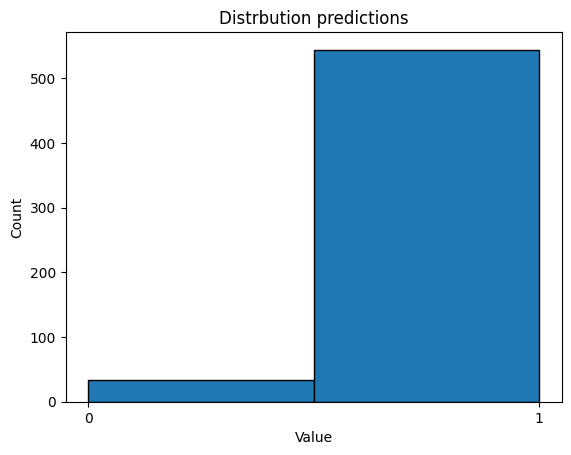

              precision    recall  f1-score   support

           0       0.42      0.19      0.26        74
           1       0.89      0.96      0.92       503

    accuracy                           0.86       577
   macro avg       0.66      0.58      0.59       577
weighted avg       0.83      0.86      0.84       577


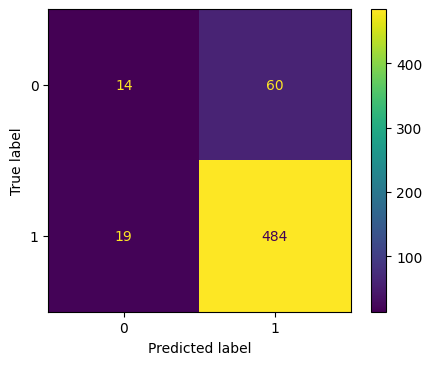

Cohen's Kappa score:  0.19825872834403313
params after probability set to True:
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


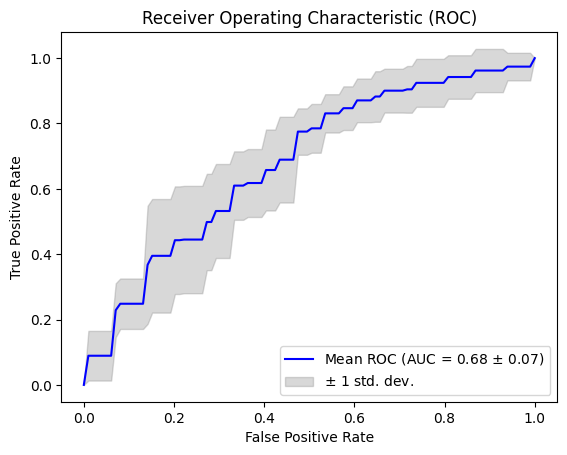

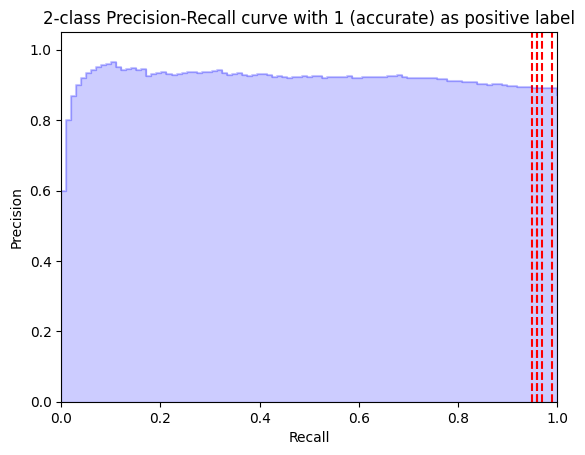

In [18]:
svm_pipeline(x, y, "f1_macro")

## Free Recall (only encoding 1)

In [19]:
df_1 = df[(df['free_cued_recall'] == 1)]

In [20]:
df_1

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,32.923183,0.033205,32.044086,32.676346,33.693400,1.649315,19.743969,11.842160,...,1,100.0,1.0,1,0.46,0.115000,0.0,0.0,0.0,0.0
16,16,0,20.974648,0.156597,18.389637,19.926580,24.381973,5.992336,92.538580,74.097580,...,1,100.0,1.0,1,2.88,0.261111,2.0,0.0,0.0,0.0
33,33,0,23.000427,0.173643,18.209530,23.437542,27.607498,9.397968,155.602460,164.689700,...,1,100.0,1.0,1,1.22,0.122000,0.0,0.0,0.0,0.0
39,39,0,37.571743,0.025486,36.763130,37.658370,38.466846,1.703716,32.898453,23.745441,...,1,NaN,NaN,1,0.32,0.040000,0.0,0.0,0.0,0.0
43,43,0,30.216204,0.176369,29.394360,31.971489,33.521046,4.126686,256.791100,115.068290,...,1,NaN,NaN,1,5.05,0.566250,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,22.760036,0.116876,21.855537,22.616938,23.708267,1.852730,53.822320,28.276720,...,1,NaN,NaN,1,1.57,0.256667,0.0,0.0,0.0,0.0
3313,3313,0,33.311300,0.038063,32.446200,32.790160,34.015087,1.568886,11.343438,5.040899,...,1,100.0,1.0,1,2.54,0.280000,1.0,0.0,0.0,0.0
3322,3322,0,22.198885,0.125262,20.153378,22.844580,24.517183,4.363806,135.166300,124.021720,...,1,NaN,NaN,1,0.96,0.074167,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.858000,...,1,100.0,1.0,1,2.61,0.174545,0.0,0.0,0.0,0.0


In [21]:
participant_ids = df_1["participant"].values

df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_1

/tmp/ipykernel_3288018/3439554378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,0.222011,-1.476180,0.607229,0.109329,-0.503131,-1.010456,-0.762776,-0.695276,...,1,100.0,1.0,1,-1.087347,0.890485,0.000000,0.000000,0.000000,0.000000
16,16,0,0.162070,1.274653,-0.332071,-0.199883,1.156364,1.903513,0.609296,0.398419,...,1,100.0,1.0,1,2.788441,2.258260,2.940588,0.000000,0.000000,0.000000
33,33,0,-0.947464,1.462671,-2.659530,-0.347434,1.523171,3.145803,0.407245,0.343628,...,1,100.0,1.0,1,-0.377583,-0.466001,-0.816497,-0.267261,0.000000,0.000000
39,39,0,1.377801,-1.446850,0.875876,1.502217,2.141795,-0.699061,-1.076670,-0.661563,...,1,NaN,NaN,1,-0.639206,-0.838333,-0.485071,-0.277350,-0.277350,0.000000
43,43,0,-0.206168,1.701517,-1.063773,0.612828,0.813658,1.581927,-0.318123,-0.692163,...,1,NaN,NaN,1,1.007088,1.615123,1.020621,0.408248,0.866025,1.581139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,-1.288958,-0.441700,-0.703013,-1.065515,-1.527071,-1.550925,-0.690201,-0.751148,...,1,NaN,NaN,1,-0.292224,0.690013,-0.688247,-0.483368,-0.447214,-0.301511
3313,3313,0,1.254800,-1.838889,0.895292,0.419094,0.034952,-0.712159,-0.972932,-0.792081,...,1,100.0,1.0,1,-0.415168,-0.015188,-0.127000,-0.353553,-0.353553,-0.353553
3322,3322,0,0.236137,-0.885988,0.449331,0.553671,0.098263,-0.455456,1.104841,1.497956,...,1,NaN,NaN,1,0.257579,-0.944164,-0.353553,0.000000,0.000000,0.000000
3334,3334,0,-0.215821,-0.732918,0.547938,-0.492261,-0.640395,-0.829169,0.415597,1.358923,...,1,100.0,1.0,1,0.193762,-0.722601,-0.899229,-0.585206,-0.277350,0.000000


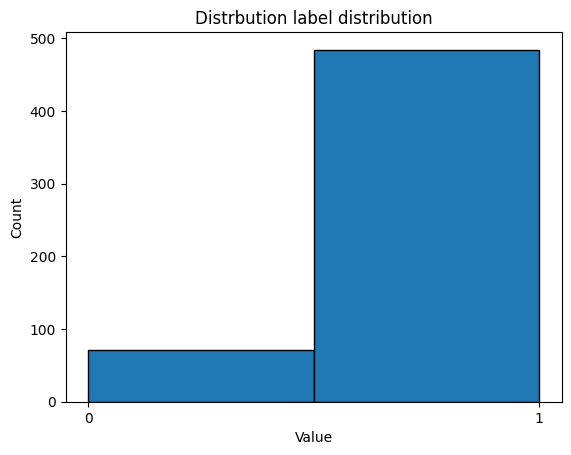

In [22]:
y = df_1["accuracy"].values
x = df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'sigmoid'}

printing accuracy measures
avg (train): 0.7072072072072072
std (train): 0.024589809124245365
avg (validation): 0.6738738738738739
std (validation): 0.03292912951801272

printing roc_auc measures
avg (train): 0.762980521143558
std (train): 0.010471000752231431
avg (validation): 0.7110427916871215
std (validation): 0.047068371375708185

printing f1_macro measures
avg (train): 0.5944042470237709
std (train): 0.02094901710202446
avg (validation): 0.5549037127638506
std (validation): 0.021992629908972817


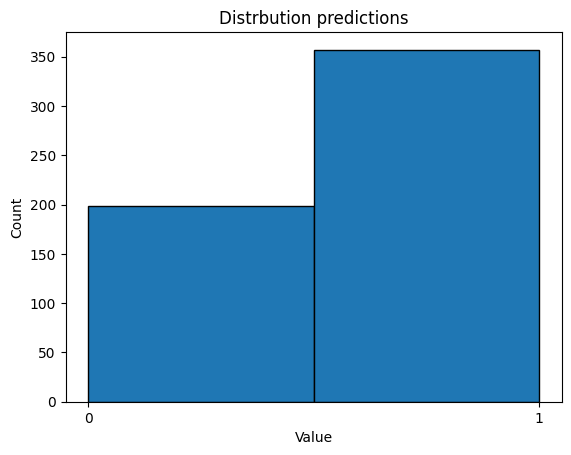

              precision    recall  f1-score   support

           0       0.22      0.62      0.33        71
           1       0.92      0.68      0.78       484

    accuracy                           0.67       555
   macro avg       0.57      0.65      0.56       555
weighted avg       0.83      0.67      0.73       555


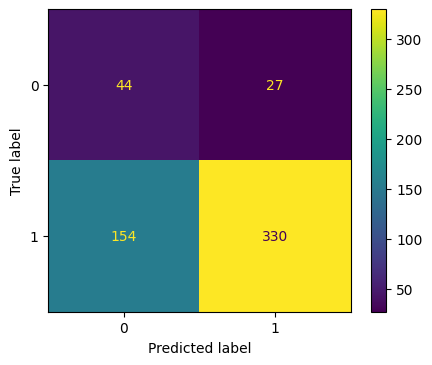

Cohen's Kappa score:  0.17101973114153432
params after probability set to True:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


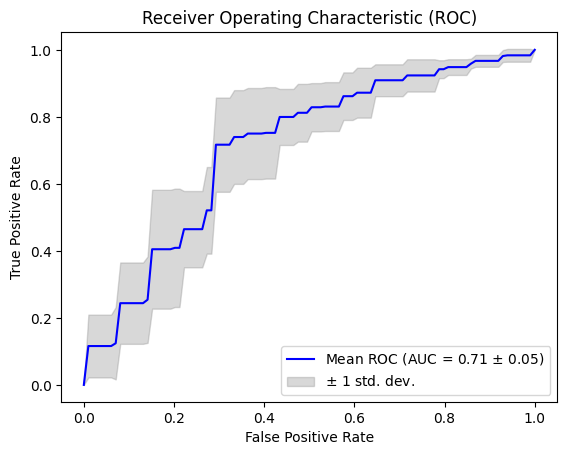

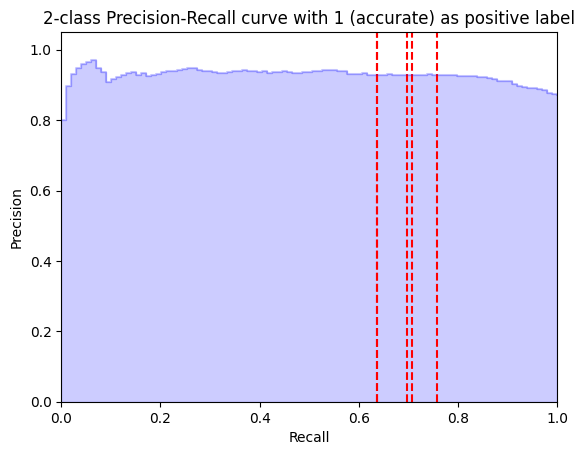

In [23]:
svm_pipeline(x, y, "roc_auc")

running param search
finished param search
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'poly'}

printing accuracy measures
avg (train): 1.0
std (train): 0.0
avg (validation): 0.8738738738738739
std (validation): 0.02905318107494974

printing roc_auc measures
avg (train): 1.0
std (train): 0.0
avg (validation): 0.6369021027655049
std (validation): 0.09279334479106413

printing f1_macro measures
avg (train): 1.0
std (train): 0.0
avg (validation): 0.5979328177011227
std (validation): 0.10025357088331001


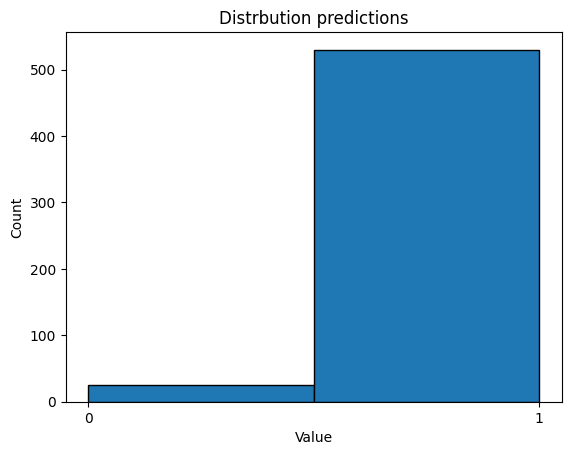

              precision    recall  f1-score   support

           0       0.52      0.18      0.27        71
           1       0.89      0.98      0.93       484

    accuracy                           0.87       555
   macro avg       0.71      0.58      0.60       555
weighted avg       0.84      0.87      0.85       555


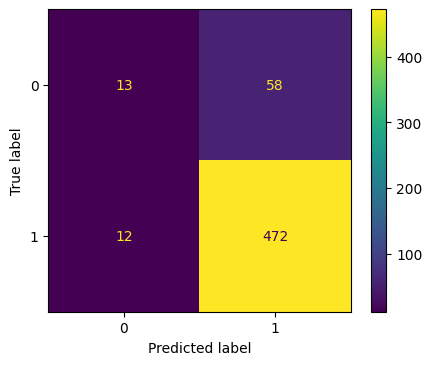

Cohen's Kappa score:  0.21878141966619738
params after probability set to True:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


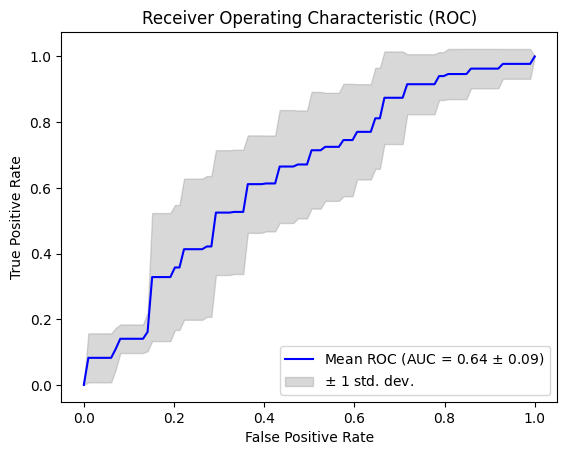

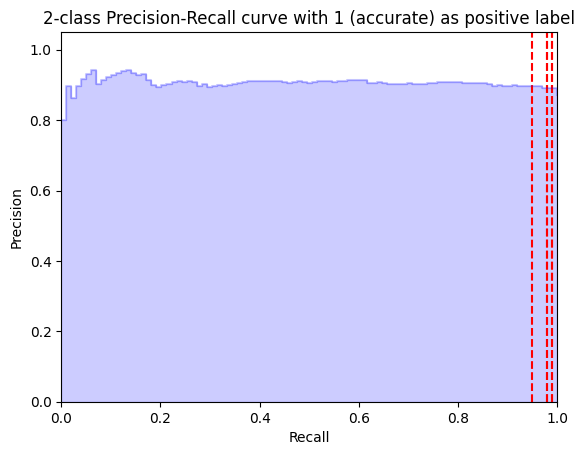

In [24]:
svm_pipeline(x, y, "f1_macro")

## Encoding 2 and 3 together

Trying out the last combination

In [25]:
df_23 = df[(df['free_cued_recall'] == 2) | (df['free_cued_recall'] == 3)]

In [26]:
df_23

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,3.35,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,2.46,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,8.16,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.92,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,3.15,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,27.852308,0.230130,19.607422,31.506860,34.374207,14.766785,68.922646,0.00000,...,1,100.0,1.0,2,1.36,0.160000,0.0,0.0,0.0,0.0
3331,3331,0,27.687168,0.203770,20.195457,31.439848,32.236520,12.041061,205.113660,173.75590,...,0,100.0,1.0,2,2.26,0.197500,0.0,0.0,0.0,0.0
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,8.35,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,2.17,0.166667,0.0,0.0,0.0,0.0


In [27]:
participant_ids = df_23["participant"].values

df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_23

/tmp/ipykernel_3288018/1677081604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.233258,0.246706,0.898160,0.430829,0.221631,-0.868333,0.081498,0.309226,...,0,20.0,1.0,2,0.068589,-0.109689,0.327693,0.861776,-0.496841,-0.451335
1,1,0,-0.749761,0.877474,-2.046840,-0.406191,0.026621,2.499573,-0.826910,-0.650424,...,1,80.0,1.0,2,-0.068528,0.011551,0.256046,1.037393,-0.542636,-0.411693
2,2,0,-0.638487,-0.349550,-0.118559,-0.822770,-0.789592,-0.713067,-0.025660,0.166837,...,1,60.0,1.0,2,4.443974,1.381418,5.641326,2.236068,-0.267261,0.000000
3,3,0,0.869613,-0.602675,1.053841,0.987032,0.467012,-0.829644,-0.287560,-0.378629,...,1,100.0,2.0,2,-0.596676,-0.653095,-0.687871,-0.524350,-0.353553,-0.282843
4,4,0,0.376321,-0.495052,0.631315,-0.118100,-0.203377,-0.727075,-0.972397,-0.572318,...,1,80.0,1.0,2,-0.274330,-0.358778,-0.091971,-0.665138,-0.532152,-0.456435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,-0.426296,0.663743,-0.868541,0.187972,0.124666,1.117658,-0.764227,-0.782672,...,1,100.0,1.0,2,-0.867020,-0.382743,-0.651631,-0.583460,-0.485071,-0.324443
3331,3331,0,-1.582325,1.379249,-2.251972,-0.058250,-0.483334,2.310860,0.080559,-0.101149,...,0,100.0,1.0,2,-0.125185,0.039987,-0.727171,-0.378284,-0.181818,-0.204124
3332,3332,0,-0.406894,1.313422,-1.045187,-0.413070,0.304133,1.585114,0.821624,0.867237,...,1,80.0,1.0,2,2.120366,0.183258,1.959633,1.069883,-0.523205,-0.441771
3333,3333,0,-0.183899,-0.212176,0.548571,0.198088,-0.506959,-0.892824,0.468644,0.221079,...,1,80.0,2.0,2,-0.052484,-0.178510,-0.687871,-0.524350,-0.353553,-0.282843


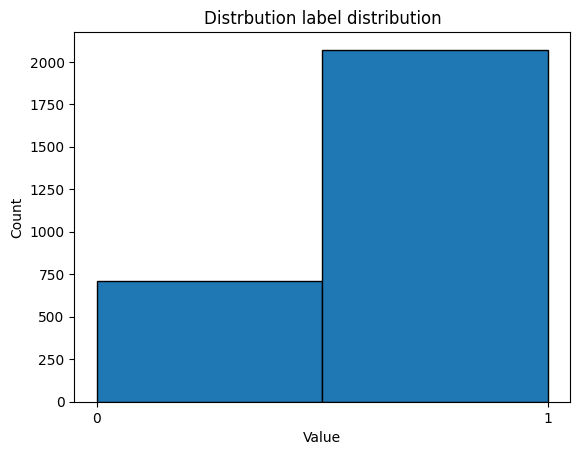

In [28]:
y = df_23["accuracy"].values
x = df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 5, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.6452185711257155
std (train): 0.007654497806867694
avg (validation): 0.5826776280950104
std (validation): 0.013069736688543962

printing roc_auc measures
avg (train): 0.7249469137846607
std (train): 0.003622107213925118
avg (validation): 0.6193041455544499
std (validation): 0.023627115545070444

printing f1_macro measures
avg (train): 0.6142659294593318
std (train): 0.0050964392240480305
avg (validation): 0.5468940000912635
std (validation): 0.013489768416309124


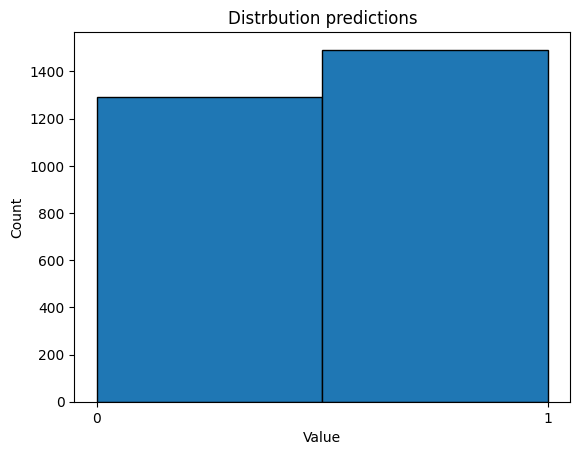

              precision    recall  f1-score   support

           0       0.33      0.59      0.42       711
           1       0.80      0.58      0.67      2071

    accuracy                           0.58      2782
   macro avg       0.57      0.59      0.55      2782
weighted avg       0.68      0.58      0.61      2782


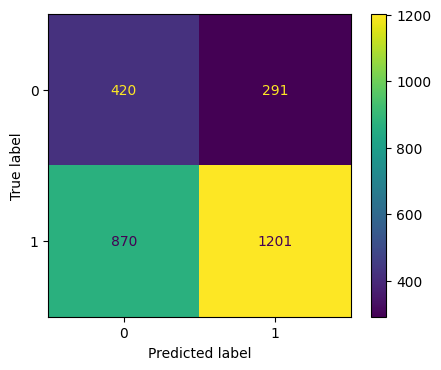

Cohen's Kappa score:  0.13463180011156356
params after probability set to True:
{'C': 5, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


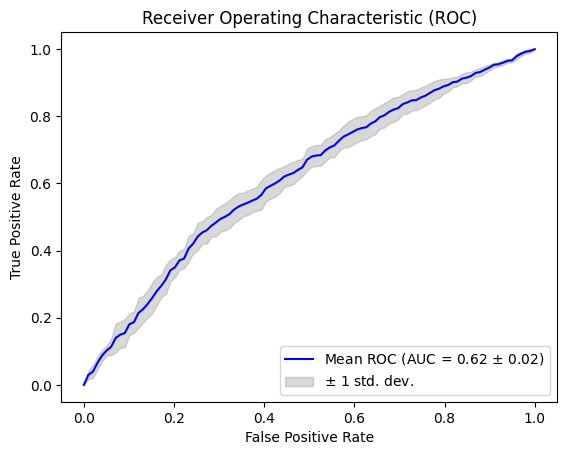

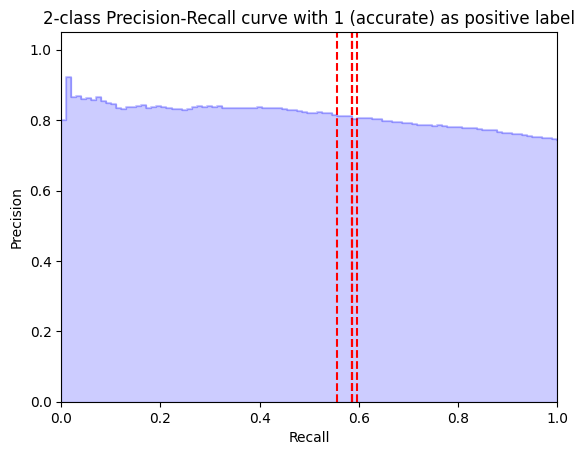

In [29]:
svm_pipeline(x, y, "roc_auc")

running param search
finished param search
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.6463875950210485
std (train): 0.006688130082426506
avg (validation): 0.6207851671983777
std (validation): 0.02299278166859382

printing roc_auc measures
avg (train): 0.6799639507565566
std (train): 0.004627009458385801
avg (validation): 0.6171666651389092
std (validation): 0.027402742732775733

printing f1_macro measures
avg (train): 0.6014048936619938
std (train): 0.003632979151047154
avg (validation): 0.5725865508709415
std (validation): 0.025578342342631823


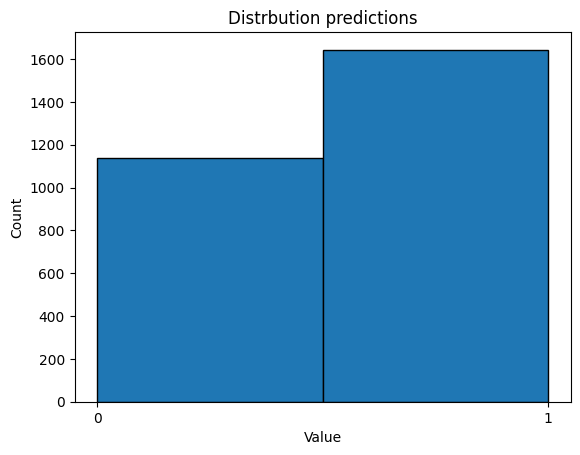

              precision    recall  f1-score   support

           0       0.35      0.56      0.43       711
           1       0.81      0.64      0.72      2071

    accuracy                           0.62      2782
   macro avg       0.58      0.60      0.57      2782
weighted avg       0.69      0.62      0.64      2782


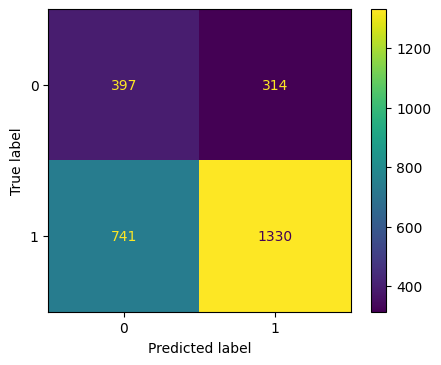

Cohen's Kappa score:  0.16753411113083932
params after probability set to True:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


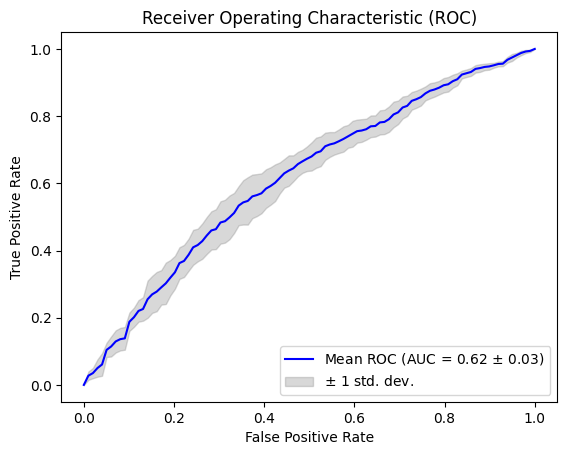

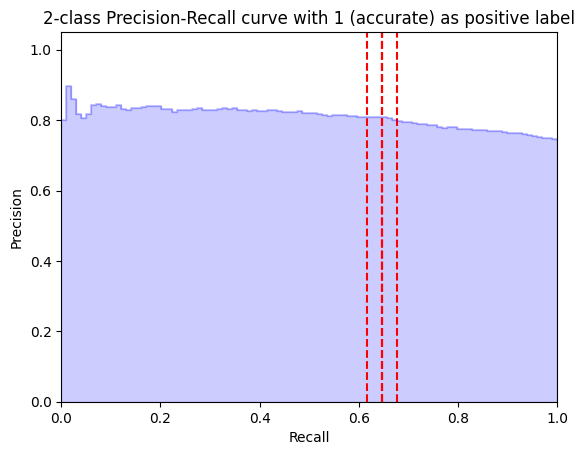

In [30]:
svm_pipeline(x, y, "f1_macro")